In [1]:
import pandas as pd

In [2]:
import os
import sys
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
print(dir_path)
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import time
import numpy as np
import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
from lynne_pp import *
import pandas as pd
import matplotlib.pyplot as plt


/Users/josh/Documents/Harvard/GLM


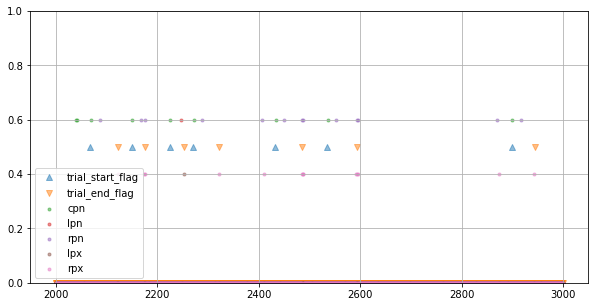

In [3]:
df = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt')
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
df = rename_columns(df)
df = define_trial_starts_ends(df, trial_shift_bounds=1)

lb = 2000
ub = 3000

plt.figure(figsize=(10,5))
care = df.iloc[lb:ub]
for col in ['trial_start_flag', 'trial_end_flag', 'cpn', 'lpn', 'rpn', 'lpx', 'rpx']:
    if col == 'trial_start_flag':
        marker = '^'
        mult = 0.5
    elif col == 'trial_end_flag':
        marker = 'v'
        mult = 0.5
    else:
        marker = '.'
        if col[-1] == 'n':
            mult = 0.6
        else:
            mult = 0.4
    care_filt = care#[care[col] > 0]
    plt.scatter(care_filt.index, care_filt[col]*mult, label=col, alpha=0.5, marker=marker)
plt.ylim(0,1)
plt.grid(True, which='both')
plt.legend()

In [4]:
df_t = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt')
df_t

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
0,0,0,0,0,0,0,1,0,0.1,0.9,0
1,0,0,0,0,0,0,1,0,0.1,0.9,0
2,0,0,0,0,0,0,1,0,0.1,0.9,0
3,0,0,0,0,0,0,1,0,0.1,0.9,0
4,0,0,0,0,0,0,1,0,0.1,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
260,1,28386,28387,28404,28444,28408,0,1,0.1,0.9,1
261,1,28544,28545,28561,28588,28564,0,1,0.1,0.9,1
262,1,28714,28715,28729,28758,28736,0,1,0.1,0.9,1
263,1,28810,28811,28828,28864,28832,0,1,0.1,0.9,1


In [5]:
# dftmp = df.copy()
# dftmp.loc[df_t['photometrySideOutIndex'].values].drop(0)

In [6]:
# idx = 1354
# dftmp.loc[idx-10:idx+10]

In [7]:
col_lst = [
    'photometryCenterInIndex',
    'photometryCenterOutIndex',
    'photometrySideInIndex',
    'photometrySideOutIndex',
    'photometryFirstLickIndex'
]

In [8]:
import glob

df2 = pd.DataFrame()

data_folder = '/Users/josh/Documents/Harvard/GLM'

# GLM_SIGNALS_WT61_10062021.txt

for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
    table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
    print(fn, '--', table_fn)

    df_t = pd.read_csv(table_fn)

    df = pd.read_csv(fn)    
    df = df[[_ for _ in df.columns if 'Unnamed' not in _]]

    for col in df_t.columns:
        if 'Index' not in col:
            continue
        print(col)
        df_t_tmp = df_t[(df_t['hasAllPhotometryData'] > 0)&(df_t[col] > 0)].copy()
        df_t_tmp[col] = df_t_tmp[col] - 1
        # display(df_t_tmp.set_index(col)[['wasRewarded']])
        # display(df.columns)

        # df[col] = df_t_tmp.set_index(col)['wasRewarded']

        num_inx_vals = df_t_tmp.groupby(col)['hasAllPhotometryData'].count()
        dupe_inx_vals = num_inx_vals[num_inx_vals > 1].index

        if len(dupe_inx_vals) > 0:
            display(df_t_tmp[df_t_tmp['photometryCenterOutIndex'].isin(dupe_inx_vals)])

        single_inx_vals = num_inx_vals[num_inx_vals == 1].index

        df[col] = df_t_tmp[df_t_tmp[col].isin(single_inx_vals)].set_index(col)['wasRewarded']

        df[f'{col}_r'] = df[col]
        df[f'{col}_nr'] = (1 - df[col])

    df['nTrial'] = ((~df['photometryCenterInIndex'].isna())*1).cumsum()
    df['nEndTrial'] = ((~df['photometrySideOutIndex'].isna())*1).cumsum()



    print(df2.isna().sum().sum())

    if len(df2) == 0:
        df2 = df.copy()
    else:
        df2 = df2.append(df)

    # display(df2)
    # break

/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10152021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
68,1,1607,1736,1626,1663,1629,1,0,0.85,0.15,1
69,1,1736,1736,1755,1790,1758,1,0,0.85,0.15,1
75,1,2414,2461,2432,2435,0,0,1,0.85,0.15,0
76,1,2461,2461,2479,2512,2482,1,0,0.85,0.15,1
80,1,2750,2832,2768,2806,2772,1,0,0.85,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...
415,1,39454,39454,39474,39502,39476,1,0,0.85,0.15,1
418,1,39713,39759,39737,39741,0,1,0,0.15,0.85,0
419,1,39759,39759,39783,39786,0,1,0,0.15,0.85,0
432,1,40859,40934,40881,40912,40884,1,0,0.15,0.85,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
0.0
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10042021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10042021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
15,1,1187,1351,1204,1246,1209,1,0,0.95,0.05,1
16,1,1351,1351,1372,1409,1375,1,0,0.95,0.05,1
17,1,1435,1968,1453,1497,1456,1,0,0.95,0.05,1
18,1,1967,1968,1991,1996,0,0,1,0.95,0.05,0
19,1,2247,2286,2263,2268,0,0,1,0.95,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...
271,1,32056,32057,32075,32123,32078,1,0,0.95,0.05,1
273,1,32321,32467,32344,32384,32348,1,0,0.95,0.05,1
274,1,32466,32467,32486,32532,32489,1,0,0.95,0.05,1
276,1,32698,32784,32716,32762,32720,1,0,0.95,0.05,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
634257
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
11,1,1764,1879,1781,1818,1784,0,1,0.1,0.9,1
12,1,1879,1879,1897,1934,1901,0,1,0.1,0.9,1
14,1,2070,2152,2089,2123,2092,0,1,0.1,0.9,1
15,1,2152,2152,2169,2176,2174,0,1,0.1,0.9,0
18,1,2435,2537,2451,2486,2454,0,1,0.1,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
245,1,27030,27037,27071,27105,27076,1,0,0.9,0.1,1
252,1,27693,27766,27711,27741,27716,1,0,0.9,0.1,1
253,1,27765,27766,27786,27791,0,1,0,0.1,0.9,0
256,1,27983,28100,28000,28030,28002,0,1,0.1,0.9,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
1137822
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10132021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10132021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
19,1,2341,2411,2359,2391,2362,1,0,0.85,0.15,1
20,1,2411,2411,2428,2432,0,0,1,0.85,0.15,0
28,1,3343,3470,3362,3399,3365,1,0,0.85,0.15,1
29,1,3470,3470,3489,3494,0,0,1,0.85,0.15,0
30,1,3748,3789,3763,3767,0,0,1,0.85,0.15,0
...,...,...,...,...,...,...,...,...,...,...,...
316,1,31604,31604,31622,31667,31625,1,0,0.85,0.15,1
322,1,32147,32227,32165,32196,32168,0,1,0.15,0.85,1
323,1,32226,32227,32243,32280,32246,0,1,0.15,0.85,1
326,1,32475,32568,32493,32531,32495,0,1,0.15,0.85,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
1570512
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10082021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10082021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
21,1,3562,3693,3586,3627,3589,1,0,0.9,0.1,1
22,1,3693,3693,3711,3752,3714,1,0,0.9,0.1,1
44,1,6356,6597,6372,6384,6374,1,0,0.9,0.1,1
45,1,6597,6597,6616,6651,6619,1,0,0.9,0.1,1
57,1,7902,7994,7919,7955,7922,0,1,0.1,0.9,1
58,1,7993,7994,8011,8052,8014,0,1,0.1,0.9,1
68,1,9184,9226,9201,9207,0,0,1,0.1,0.9,0
69,1,9226,9226,9242,9273,9245,0,1,0.1,0.9,1
80,1,10713,10755,10731,10735,0,0,1,0.1,0.9,0
81,1,10755,10755,10772,10775,0,1,0,0.1,0.9,0


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
2060424
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10182021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10182021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
9,1,2905,3203,2926,2930,0,0,1,0.85,0.15,0
10,1,3203,3203,3220,3229,3228,0,1,0.85,0.15,0
19,1,4782,4819,4799,4802,0,1,0,0.85,0.15,0
20,1,4819,4819,4844,4847,0,0,1,0.85,0.15,0
21,1,4903,4985,4923,4960,4927,1,0,0.85,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...
284,1,38728,38728,38747,38751,0,0,1,0.85,0.15,0
288,1,39082,39199,39096,39134,39099,1,0,0.85,0.15,1
289,1,39199,39199,39220,39258,39223,1,0,0.85,0.15,1
307,1,42277,42384,42292,42323,42295,1,0,0.85,0.15,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
2471292
/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10112021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10112021.txt
photometryCenterInIndex
photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
8,1,1578,1653,1603,1607,0,1,0,0.15,0.85,0
9,1,1653,1653,1675,1711,1678,0,1,0.15,0.85,1
14,1,2385,2492,2403,2439,2405,0,1,0.15,0.85,1
15,1,2491,2492,2509,2550,2512,0,1,0.15,0.85,1
29,1,3883,3985,3901,3940,3904,1,0,0.15,0.85,1
...,...,...,...,...,...,...,...,...,...,...,...
340,1,34496,34496,34514,34550,34517,1,0,0.85,0.15,1
346,1,34966,35123,34986,35041,34990,1,0,0.85,0.15,1
347,1,35123,35123,35141,35177,35144,1,0,0.85,0.15,1
353,1,35573,35674,35588,35633,35590,0,1,0.15,0.85,1


photometrySideInIndex
photometrySideOutIndex
photometryFirstLickIndex
3133836


In [9]:
# glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt')

In [10]:
df2

,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,...,photometrySideInIndex_r,photometrySideInIndex_nr,photometrySideOutIndex,photometrySideOutIndex_r,photometrySideOutIndex_nr,photometryFirstLickIndex,photometryFirstLickIndex_r,photometryFirstLickIndex_nr,nTrial,nEndTrial
0,0.555517,-0.207614,0.720531,-0.801691,0.452445,-1.159573,-0.603638,0.526995,0.452445,-1.159573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.821058,-1.212011,0.128694,0.700425,0.479802,0.440579,-1.458203,0.118326,0.479802,0.440579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,0.895495,-1.309689,0.399287,-0.639261,0.427776,0.009070,-0.136884,0.645182,0.427776,0.009070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,0.369373,0.235882,-0.657023,1.163822,1.076511,-2.299252,0.615730,1.835773,1.076511,-2.299252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,0.633833,0.080268,-0.220334,2.294948,2.274924,-1.121843,0.704893,0.508825,2.274924,-1.121843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37012,2.562576,-1.677753,1.878167,0.133261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,360
37013,4.246441,-0.236823,4.886373,-0.874492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,360
37014,4.408608,-0.663953,4.798602,-0.210249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,360
37015,2.364343,0.720721,2.718583,1.764168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,360


In [11]:
import glob
from collections import defaultdict

fn = glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_10152021.txt')[0]
table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
print(fn, '--', table_fn)

df_t = pd.read_csv(table_fn)

df = pd.read_csv(fn)
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]


for col in df_t.columns:
    if 'Index' not in col:
        continue
    print(col)
    df_t_tmp = df_t[(df_t['hasAllPhotometryData'] > 0)&(df_t[col] > 0)].copy()
    df_t_tmp[col] = df_t_tmp[col] - 1
    # display(df_t_tmp.set_index(col)[['wasRewarded']])
    # display(df.columns)

    # df[col] = df_t_tmp.set_index(col)['wasRewarded']

    num_inx_vals = df_t_tmp.groupby(col)['hasAllPhotometryData'].count()
    dupe_inx_vals = num_inx_vals[num_inx_vals > 1].index
    display(df_t_tmp[df_t_tmp['photometryCenterOutIndex'].isin(dupe_inx_vals)])

    single_inx_vals = num_inx_vals[num_inx_vals == 1].index

    df[col] = df_t_tmp[df_t_tmp[col].isin(single_inx_vals)].set_index(col)['wasRewarded']

df['nTrial'] = ((~df['photometryCenterInIndex'].isna())*1).cumsum()
df['nEndTrial'] = ((~df['photometrySideOutIndex'].isna())*1).cumsum()


/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10152021.txt
photometryCenterInIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded


photometryCenterOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
68,1,1607,1736,1626,1663,1629,1,0,0.85,0.15,1
69,1,1736,1736,1755,1790,1758,1,0,0.85,0.15,1
75,1,2414,2461,2432,2435,0,0,1,0.85,0.15,0
76,1,2461,2461,2479,2512,2482,1,0,0.85,0.15,1
80,1,2750,2832,2768,2806,2772,1,0,0.85,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...
415,1,39454,39454,39474,39502,39476,1,0,0.85,0.15,1
418,1,39713,39759,39737,39741,0,1,0,0.15,0.85,0
419,1,39759,39759,39783,39786,0,1,0,0.15,0.85,0
432,1,40859,40934,40881,40912,40884,1,0,0.15,0.85,1


photometrySideInIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded


photometrySideOutIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded


photometryFirstLickIndex


,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded


In [12]:
# for col_val in col_lst:
#     # new_name = col_val.replace('Index', '')
#     # df2[f'{new_name}_r'] = df2[new_name]*df2['combor']
#     # df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['combor'])

#     # df2[f'{new_name}_r'] = df2[new_name]*df2['reward']
#     # df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['reward'])

#     # df2[f'{new_name}_r'] = df2[new_name]*df2['wasRewarded']
#     # df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['wasRewarded'])

#     df2[f'{col_val}_r'] = df2[col_val]
#     df2[f'{col_val}_nr'] = (1 - df2[col_val])


In [13]:
# df2

In [14]:
# df2

In [15]:
# lb = 10530
# ub = 10600

# lb, ub = df2['wasRewarded'].iloc[lb:ub].dropna().index.min(), df2['wasRewarded'].iloc[lb:ub].dropna().index.max()

# # inx = df2.iloc[lb:ub].query("(wasRewarded != reward)&(wasRewarded == wasRewarded)&(reward == reward)")['wasRewarded'].dropna().index
# inx = df2.iloc[lb:ub].query("(wasRewarded == wasRewarded)&(reward == reward)")['wasRewarded'].dropna().index
# print(inx)

# # plt.scatter(data=df2['photometrySideIn'].iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn', label='photometrySideIn')
# # plt.scatter(data=(df2['photometrySideIn_r']*2).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_r', label='photometrySideIn_r')
# # plt.scatter(data=(df2['photometrySideIn_nr']*0.5).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_nr', label='photometrySideIn_nr')
# # plt.scatter(data=(df2['wasRewarded']*3).iloc[lb:ub].reset_index(), x='index', y='wasRewarded', label='wasRewarded')
# # plt.scatter(data=(df2['reward']*4).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='reward', label='reward')
# # # plt.scatter(data=(df2['combor']*5).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='combor', label='combor')

# plt.scatter(data=df2.loc[inx,'photometrySideIn'].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn', label='photometrySideIn')
# plt.scatter(data=(df2.loc[inx,'photometrySideIn_r']*2).replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_r', label='photometrySideIn_r')
# plt.scatter(data=(df2.loc[inx,'photometrySideIn_nr']*0.5).replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_nr', label='photometrySideIn_nr')
# plt.scatter(data=(df2.loc[inx,'wasRewarded']*3).reset_index(), x='index', y='wasRewarded', label='wasRewarded')
# plt.scatter(data=(df2.loc[inx,'reward']*4).reset_index(), x='index', y='reward', label='reward')

# plt.legend()
# plt.grid()

In [16]:
df_t[df_t['photometrySideInIndex'].between(10530, 10600)]

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
155,1,10516,10572,10533,10536,0,0,1,0.85,0.15,0
156,1,10571,10572,10593,10624,10596,1,0,0.85,0.15,1


In [17]:
with pd.option_context('max_rows', 1000, 'max_columns', 1000):
    display(df[df.reset_index()['index'].between(10530, 10600)])

,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,nTrial,nEndTrial
10530,0.577638,2.092008,0.810387,0.342304,0.202569,0.666818,-0.056357,-0.165699,0.202569,0.666818,-0.056357,-0.165699,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,90
10531,2.081151,0.593498,1.163298,-0.913881,-0.249807,-1.260880,-0.802093,0.866688,-0.249807,-1.260880,-0.802093,0.866688,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,90
10532,2.715299,-0.958491,2.077475,-0.240998,0.008618,-0.180596,0.072047,-2.363312,0.008618,-0.180596,0.072047,-2.363312,0,0,0,1,1,0,0,0,0,0,0,0,1,NaN,NaN,0.0,NaN,NaN,91,90
10533,1.768283,-0.050291,1.274917,-1.115855,0.465773,-0.547793,1.549573,0.970920,0.465773,-0.547793,1.549573,0.970920,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,91,90
10534,0.599657,0.233410,0.730695,-0.630397,1.056659,0.793070,2.356037,1.909040,1.056659,0.793070,2.356037,1.909040,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,91,90
10535,-0.380067,0.818205,-0.357238,1.050167,1.443007,0.577319,1.355929,1.781868,1.443007,0.577319,1.355929,1.781868,0,0,0,1,0,1,0,0,0,0,0,0,1,NaN,NaN,NaN,0.0,NaN,91,91
10536,-1.138131,0.858352,-1.279146,1.627810,1.177682,2.946444,2.048580,-0.011725,1.177682,2.946444,2.048580,-0.011725,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,91
10537,-1.229236,-0.120901,-1.369392,-0.234454,0.554688,0.994267,2.610200,-0.387338,0.554688,0.994267,2.610200,-0.387338,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,91
10538,-0.599212,0.065614,-0.400114,0.384548,0.395955,0.711632,2.429250,-1.270167,0.395955,0.711632,2.429250,-1.270167,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,91
10539,0.371020,0.385071,0.735276,1.291436,0.459792,0.223036,1.933694,-1.147131,0.459792,0.223036,1.933694,-1.147131,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,91,91


In [18]:
# # df2.columns

# for col in ['photometryCenterInIndex',
#             'photometryCenterOutIndex',
#             'photometrySideInIndex',
#             'photometrySideOutIndex',
#             'photometryFirstLickIndex',
#             'wasRewarded']:
#     df2[col] = 0
#     inx = df_t[col].values - 1
#     inx = inx[inx >= 0]
#     df2.loc[inx, col] = 1

01
02



06
07
01
02



06
07


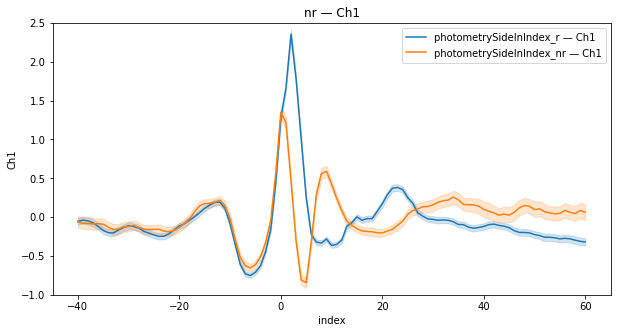

01
02



06
07
01
02



06
07


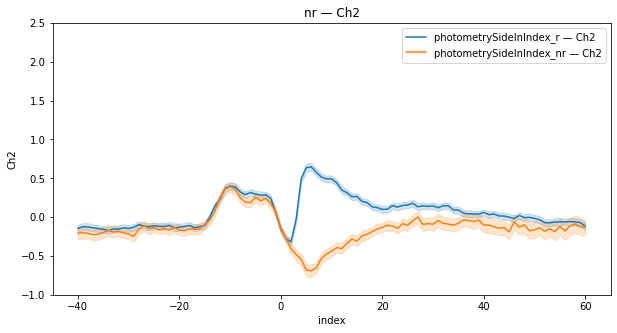

01
02



06
07
01
02



06
07


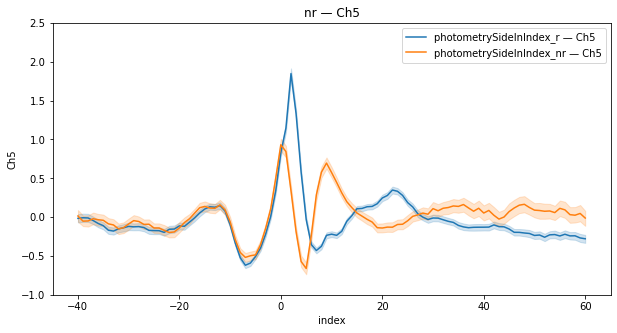

01
02



06
07
01
02



06
07


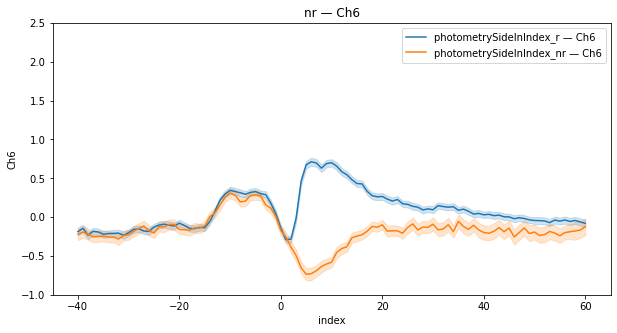

,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,...,photometrySideInIndex_r,photometrySideInIndex_nr,photometrySideOutIndex,photometrySideOutIndex_r,photometrySideOutIndex_nr,photometryFirstLickIndex,photometryFirstLickIndex_r,photometryFirstLickIndex_nr,nTrial,nEndTrial
0,-126,-1.335076,0.785121,-1.581157,0.643631,-0.928084,1.723685,-0.759740,-1.150465,-0.928084,...,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,8,8
1,-125,-1.194457,3.041182,-0.248357,0.457175,-0.426822,1.122438,-1.301598,1.077425,-0.426822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
2,-124,-0.459302,1.198900,0.794168,2.380037,0.656290,2.000256,-2.122639,-0.480512,0.656290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
3,-123,0.301843,-0.274855,1.198334,-0.848428,1.151820,0.929757,-1.561534,-1.270263,1.151820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
4,-122,0.728311,-0.031775,0.318440,-0.996011,1.485082,-0.557972,-1.633564,-1.424011,1.485082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,35,0.483259,-0.342548,0.061317,0.815913,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,354
153,36,0.331137,-0.060428,0.718842,0.411951,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,354
154,37,-0.011928,0.936727,-0.188026,0.812420,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,354
155,38,0.274300,1.407852,-0.595536,0.116283,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,354


In [19]:
import seaborn as sns
from tqdm.notebook import tqdm

for channel in ['Ch1', 'Ch2', 'Ch5', 'Ch6']:
    plt.figure(figsize=(10,5))
    # for alignment_col in ['ft_r_spn', 'ft_nr_spn']:
    for alignment_col in ['photometrySideInIndex_r', 'photometrySideInIndex_nr']:
    # for alignment_col in ['photometrySideIn_nr']:
        relative_df = pd.DataFrame()
        rel_points = df2[df2[alignment_col] > 0].reset_index()
        # display(rel_points.iloc[:, -15:])
    #     break
    # break

        print('01')
        identifiers = rel_points[['index', 'nTrial', 'nEndTrial']].dropna().values.astype(int)
        print('02')

        lst_extendeds = []
        
        for idx, nTrial, nEndTrial in tqdm(identifiers):
            extended_trial = df2[(df2['nTrial'] == nTrial) | (df2['nEndTrial'] == nEndTrial)].reset_index().copy()
            # print('03', idx)
            extended_trial['index'] -= idx
            # print('04', idx)

            lst_extendeds.append(extended_trial.copy())


    #         # display(rel_points.iloc[:, -15:])
    #         with pd.option_context('max_columns', 1000, 'max_rows', 2000):
    #             display(extended_trial[extended_trial['index'].between(-3, 3)])
    # #         break
    # #     break
    # # break

            # if len(relative_df) == 0:
            #     relative_df = extended_trial.copy()
            # else:
            #     relative_df = pd.concat([relative_df, extended_trial])
            # # print('05', idx)

        relative_df = pd.concat(lst_extendeds)

        
        alignment_name = alignment_col.split('_')[-1]
        sns.lineplot(x='index', y=channel, data=relative_df[relative_df['index'].between(-40, 60)], label=f'{alignment_col} — {channel}')

        print('06')
        # plot_df = relative_df[relative_df['index'].between(-40, 60)].groupby('index')[channel].mean().reset_index()
        # plt.plot(plot_df['index'], plot_df[channel], label=f'{alignment_col} — {channel}')

        print('07')

        plt.title(f'{alignment_name} — {channel}')
        plt.ylim(-1,2.5)
        plt.grid()
    plt.legend()
    plt.show()

display(relative_df)


In [20]:
print(plot_df)

NameError: name 'plot_df' is not defined